# Sentiment Analysis on Twitter Data

This notebook is based on ["Sentiment analysis on Trump's tweets using Python"](https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-) by Rodolfo Ferro.

Accessed on November 21, 2017

In [1]:
!conda install tweepy -y

Fetching package metadata ...............
Solving package specifications: .
  - conda-forge::blinker-1.4-py35_0
  - conda-forge::blinker-1.4-py_0

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    blinker:           1.4-py35_0   conda-forge
    oauthlib:          2.0.6-py_0   conda-forge
    pyjwt:             1.5.3-py_0   conda-forge
    requests-oauthlib: 0.8.0-py35_1 conda-forge
    tweepy:            3.5.0-py35_0 conda-forge

blinker-1.4-py 100% |################################| Time: 0:00:00 203.76 kB/s
pyjwt-1.5.3-py 100% |################################| Time: 0:00:00 166.82 kB/s
oauthlib-2.0.6 100% |################################| Time: 0:00:00 284.97 kB/s
requests-oauth 100% |################################| Time: 0:00:00 298.81 kB/s
tweepy-3.5.0-p 100% |################################| Time: 0:00:00 907.04 kB/s


In [5]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [7]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

TweepError: [{'code': 215, 'message': 'Bad Authentication data.'}]

In [8]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
data.head(10)

NameError: name 'tweets' is not defined

In [9]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

NameError: name 'tweets' is not defined

In [10]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

NameError: name 'tweets' is not defined

In [11]:
data.head(10)

NameError: name 'data' is not defined

In [28]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 109.455


In [29]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Alone with 17 male informatics chairs- more chairs named Peter than female chairs. We need more women leading academic units! #WomeninAMIA
Number of likes: 199
138 characters.

The tweet with more retweets is: 
RT @scienmag: This is the reduction in perennial Arctic sea ice from 1984 to 2016 https://t.co/yTawQ0ZDt8
Number of retweets: 578
105 characters.



In [30]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

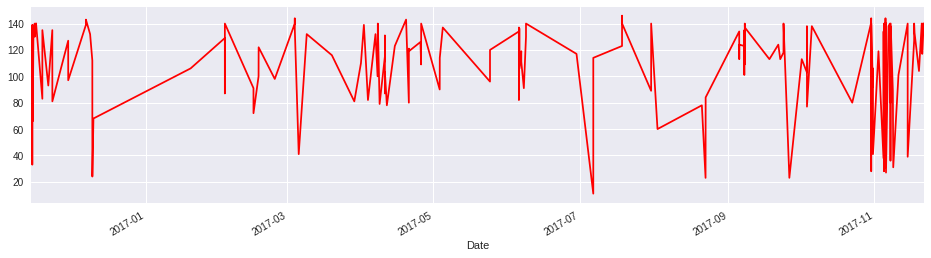

In [31]:
tlen.plot(figsize=(16,4), color='r');

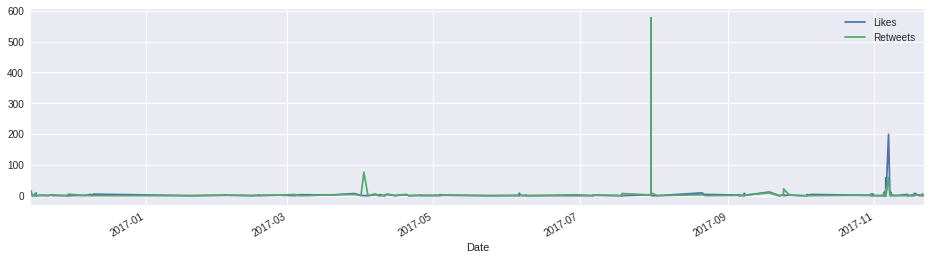

In [32]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [33]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client


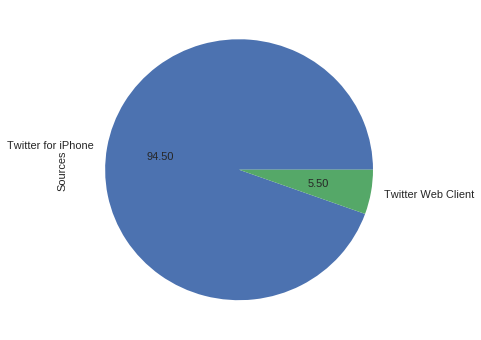

In [34]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [35]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [36]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
data.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Foundations of health informatics class buildi...,140,933016485403828224,2017-11-21 16:57:19,Twitter for iPhone,3,2,0
1,RT @DBatesSafety: New members of this group—HH...,139,932974843879866368,2017-11-21 14:11:51,Twitter for iPhone,0,4,1
2,RT @MarineCarpuat: Introducing 2018 tasks at #...,140,932973492395376640,2017-11-21 14:06:29,Twitter for iPhone,0,4,1
3,Help session for python programming fo biomedi...,117,932767879132409858,2017-11-21 00:29:27,Twitter for iPhone,5,0,0
4,@uudbmi data science for health scholars and s...,140,932757729533337600,2017-11-20 23:49:07,Twitter for iPhone,0,0,0
5,@uudbmi faculty fashion show about our researc...,140,932692948898033664,2017-11-20 19:31:42,Twitter for iPhone,1,0,0
6,"RT @drcdevries: Right Stuff, Wrong Sex: NASA’s...",104,932277100228132864,2017-11-19 15:59:16,Twitter for iPhone,0,3,-1
7,"Docker, Jupyterhub, oh my! Teaching informatic...",133,931604211770335232,2017-11-17 19:25:27,Twitter for iPhone,8,1,0
8,“The painful truth is that every minute I spen...,140,931545548619784193,2017-11-17 15:32:20,Twitter for iPhone,2,0,-1
9,RT @UofUNews: .@UofUHealth researchers develop...,127,931543982852603904,2017-11-17 15:26:07,Twitter for iPhone,0,4,-1


In [37]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [38]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 40.5%
Percentage of neutral tweets: 51.0%
Percentage of negative tweets: 8.5%
